In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv("USA_Housing.csv")

In [4]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
data = data.iloc[:,0:6]

In [6]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
dtypes: float64(6)
memory usage: 234.5 KB


### To check the correlation : Heat Map

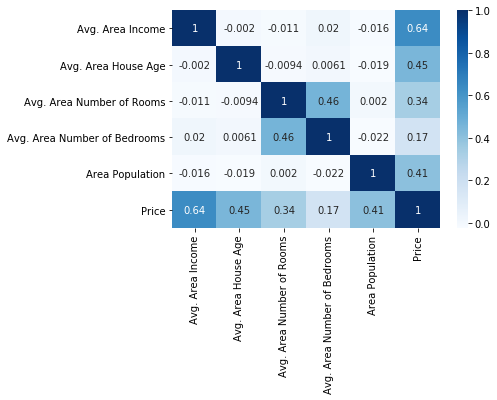

In [10]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')

### To check if the data is normally distributed - Histogram :

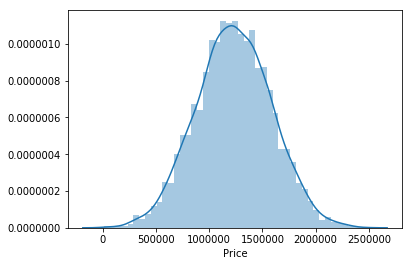

In [11]:
sns.distplot(data['Price'])

### Regression Plot:

In [12]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

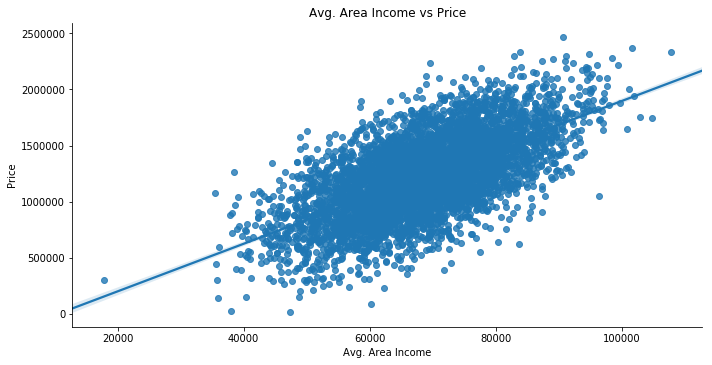

In [17]:
sns.lmplot(x='Avg. Area Income',y='Price',data=data,size=5,aspect=2)
plt.title("Avg. Area Income vs Price")
plt.show()

###  Joint plot - to see the correlation : 

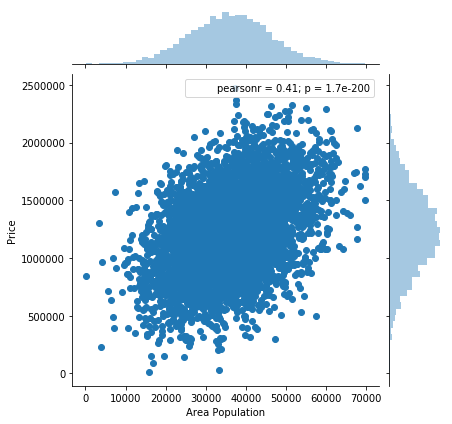

In [18]:
sns.jointplot(x='Area Population',y='Price',data=data)

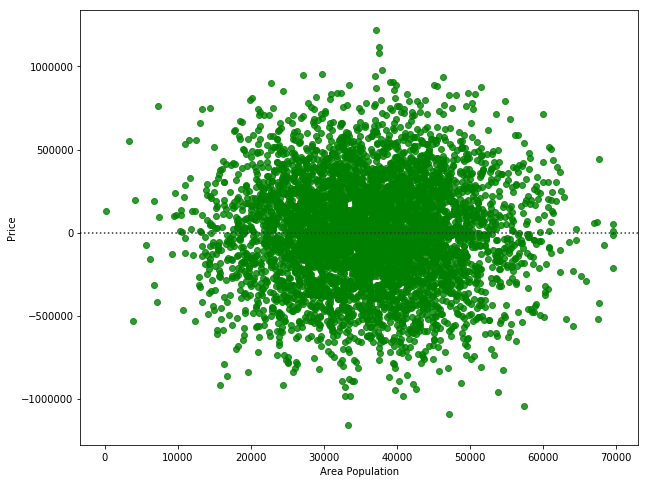

In [22]:
fig = plt.figure(figsize=(10,8))
sns.residplot(x='Area Population',y='Price',data=data,color='green')

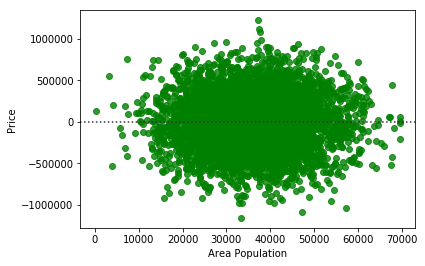

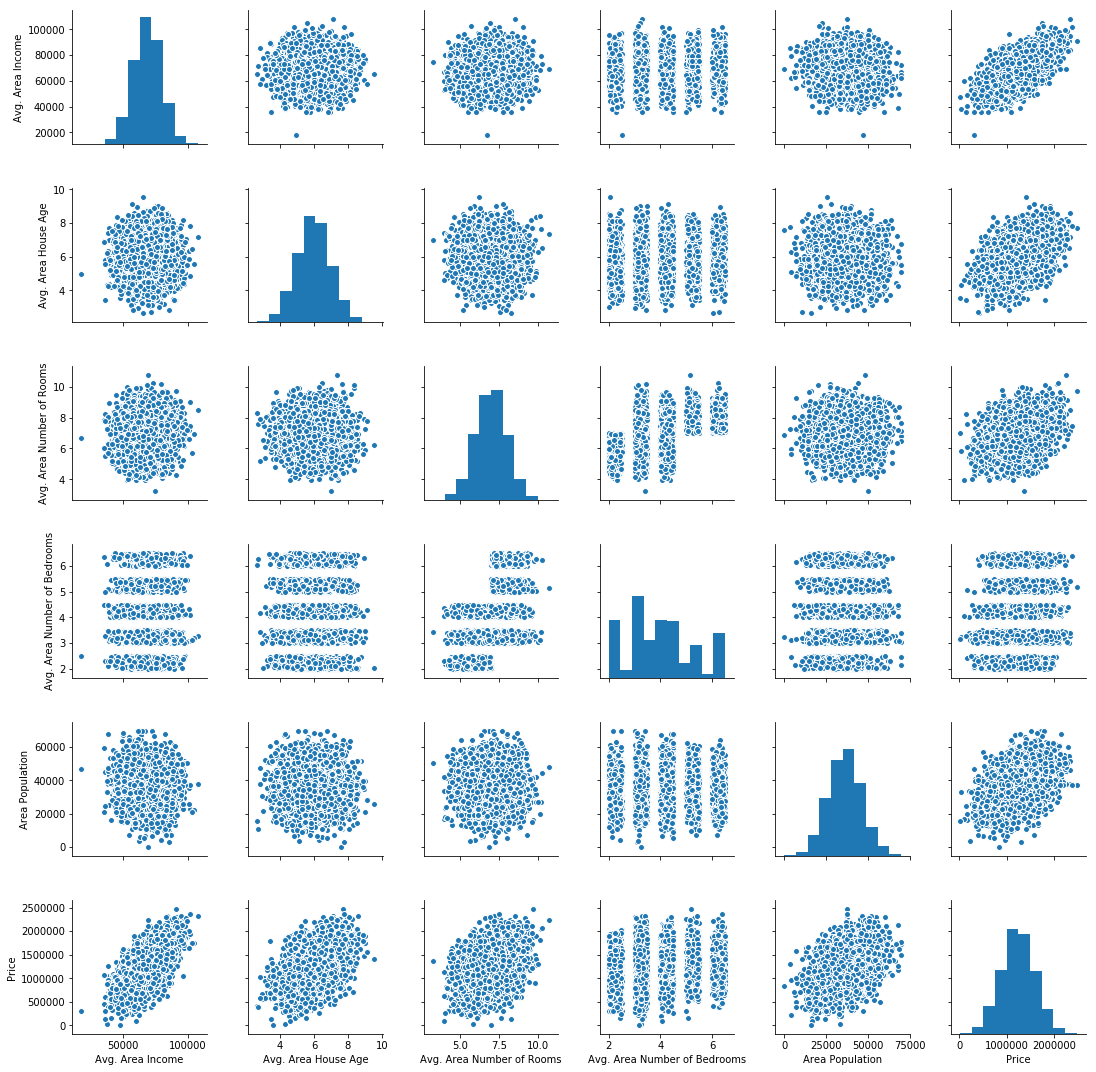

In [23]:
sns.pairplot(data)

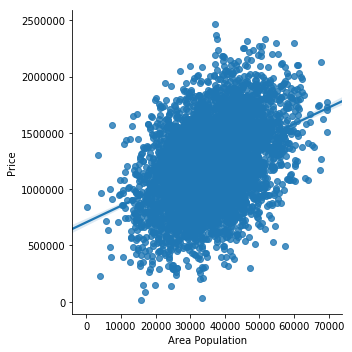

In [25]:
sns.lmplot(x='Area Population',y='Price',data=data)

### Training and testing data : 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = data.iloc[:,0:5]

In [28]:
y = data.iloc[:,5]

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [34]:
model = lr.fit(X_train,y_train)

In [36]:
#coefficents : 
print('Coefficients : \n ',lr.coef_)

Coefficients : 
  [2.15666957e+01 1.65453042e+05 1.20499839e+05 1.99978534e+03
 1.53406038e+01]


In [37]:
#intercept : 
print('intercept \n' , lr.intercept_)

intercept 
 -2640441.399781043


In [40]:
df = pd.DataFrame(data=lr.coef_.reshape(5,1),index=X.columns,columns=['coeff'])

In [41]:
df

,coeff
Avg. Area Income,21.566696
Avg. Area House Age,165453.042478
Avg. Area Number of Rooms,120499.839093
Avg. Area Number of Bedrooms,1999.785336
Area Population,15.340604


In [43]:
predict = lr.predict(X_test)

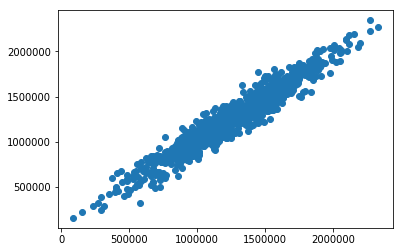

In [44]:
plt.scatter(y_test,predict)

#to visualise the predictions and the test y 

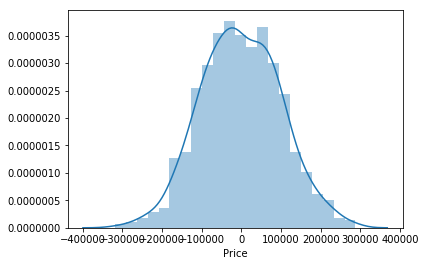

In [46]:
sns.distplot((y_test-predict))